## Plotando dados de arquivos NetCDF em Python
- Fonte: Robson Passos, para acessar arquivo original [clique aqui](https://gist.github.com/Robson-Passos/7696f490fa14a7bedba118dddd10a628)
- Dado utilizado: [ERA5 hourly data on pressure levels from 1940 to present](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview)
- As variáveis dos dados ERA5 de reanalize foram: componente zonal do vento (leste-oeste); componente meridional do vento (norte-sul); e temperatura; níveis de pressão (250 hPa, 500 hPa, 850 hPa e 1000 hPa); dias 29, 30 e 31 do mês de dezembro do ano de 2019; horários: 00:00, 06:00, 12:00 e 18:00.
- Link para baixar o dado utilizado: [Acesse aqui](https://drive.google.com/drive/folders/1jlDHxLQoYFTxwWb4kYCIFmRMTn8xR_jl?usp=sharing)

### Instalando bibliotecas/pacotes

In [60]:
!pip install cartopy -q

### Importando bibliotecas

In [61]:
#Importando bibliotecas/pacotes
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

###Abrindo o arquivo netCDF

In [14]:
#Abrindo arquivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/00_Disc_Meteo_Pratica_Python/uvt_2019.nc')
ds

<xarray.Dataset> Size: 598MB
Dimensions:         (valid_time: 12, pressure_level: 4, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 96B 2019-12-29 ... 2019-12-31...
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    expver          (valid_time) <U4 192B ...
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 199MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 199MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 199MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-06T02:30 GRIB to CDM+CF via cfgrib-0.9.1...

### Extraindo dados para a área da América do Sul

In [43]:
ds_subset = ds.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
ds_subset

<xarray.Dataset> Size: 45MB
Dimensions:         (valid_time: 12, pressure_level: 4, latitude: 281,
                     longitude: 281)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 96B 2019-12-29 ... 2019-12-31...
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 2kB 10.0 9.75 9.5 ... -59.5 -59.75 -60.0
  * longitude       (longitude) float64 2kB -90.0 -89.75 -89.5 ... -20.25 -20.0
    expver          (valid_time) <U4 192B ...
Data variables:
    t               (valid_time, pressure_level, latitude, longitude) float32 15MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 15MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 15MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-06T02:30 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
#Salvando o dataset como um novo arquivo NetCDF
ds_subset.to_netcdf('/content/drive/MyDrive/00_Disc_Meteo_Pratica_Python/ds_AS.nc')

###Extraindo as variáveis

In [44]:
u = ds_subset['u']
v = ds_subset['v']
t = ds_subset['t'] - 273.15 #convertendo de Kelvin para Celsus

wspd = (u**2 + v**2)**(0.5) #Calculando a velocidade do vento

In [45]:
u

<xarray.DataArray 'u' (valid_time: 12, pressure_level: 4, latitude: 281,
                       longitude: 281)> Size: 15MB
array([[[[ -6.026016, ...,  -0.875626],
         ...,
         [ -0.721329, ...,   3.973007]],

        ...,

        [[  0.060669, ...,  22.255981],
         ...,
         [  5.146606, ...,  35.990356]]],


       ...,


       [[[ -8.342575, ...,  -3.592575],
         ...,
         [-10.899216, ...,  -4.357224]],

        ...,

        [[ -4.67244 , ...,  26.694748],
         ...,
         [ 11.354904, ...,  20.257248]]]], dtype=float32)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 96B 2019-12-29 ... 2019-12-31...
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 2kB 10.0 9.75 9.5 ... -59.5 -59.75 -60.0
  * longitude       (longitude) float64 2kB -90.0 -89.75 -89.5 ... -20.25 -20.0
    expver          (valid_time) <U4 192B ...
Attributes: (12/31)
    GRIB_paramId:                             131
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           u
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

###Indexando e selecionando dados

In [46]:
t.valid_time

<xarray.DataArray 'valid_time' (valid_time: 12)> Size: 96B
array(['2019-12-29T00:00:00.000000000', '2019-12-29T06:00:00.000000000',
       '2019-12-29T12:00:00.000000000', '2019-12-29T18:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-30T06:00:00.000000000',
       '2019-12-30T12:00:00.000000000', '2019-12-30T18:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2019-12-31T06:00:00.000000000',
       '2019-12-31T12:00:00.000000000', '2019-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2019-12-29 ... 2019-12-31T18:...
    expver      (valid_time) <U4 192B ...
Attributes:
    long_name:      time
    standard_name:  time

In [47]:
#Selecionando pelo índice
t.isel(valid_time=slice(0, 5))

<xarray.DataArray 't' (valid_time: 5, pressure_level: 4, latitude: 281,
                       longitude: 281)> Size: 6MB
array([[[[ 2.6949005e+01,  2.6966583e+01,  2.6984161e+01, ...,
           2.3341583e+01,  2.3378693e+01,  2.3577911e+01],
         [ 2.6781036e+01,  2.6872833e+01,  2.6872833e+01, ...,
           2.3402130e+01,  2.3409943e+01,  2.3665802e+01],
         [ 2.6585724e+01,  2.6704865e+01,  2.6741974e+01, ...,
           2.3605255e+01,  2.3644318e+01,  2.3892365e+01],
         ...,
         [ 5.2790833e+00,  5.3161926e+00,  5.3767395e+00, ...,
          -4.3182373e-02, -9.9822998e-02, -1.5451050e-01],
         [ 5.0525208e+00,  5.0798645e+00,  5.1599426e+00, ...,
          -3.0685425e-01, -3.7521362e-01, -4.6115112e-01],
         [ 4.7634583e+00,  4.8025208e+00,  4.8728333e+00, ...,
          -6.7794800e-01, -7.4240112e-01, -8.1661987e-01]],

        [[ 1.9004669e+01,  1.9139435e+01,  1.9362091e+01, ...,
           2.0192169e+01,  2.0209747e+01,  2.0199982e+01],
         [ 1.9090607e+01,  1.9258575e+01,  1.9463654e+01, ...,
           2.0110138e+01,  2.0106232e+01,  2.0043732e+01],
         [ 1.9102325e+01,  1.9223419e+01,  1.9408966e+01, ...,
           1.9969513e+01,  1.9899200e+01,  1.9766388e+01],
...
          -2.0709045e+01, -2.0751038e+01, -2.0789124e+01],
         [-3.4580139e+01, -3.4598694e+01, -3.4668030e+01, ...,
          -2.0573303e+01, -2.0620178e+01, -2.0666077e+01],
         [-3.4649475e+01, -3.4631897e+01, -3.4656311e+01, ...,
          -2.0519592e+01, -2.0576233e+01, -2.0631897e+01]],

        [[-4.0831436e+01, -4.0792374e+01, -4.0762100e+01, ...,
          -4.1909561e+01, -4.1970108e+01, -4.2050186e+01],
         [-4.0842178e+01, -4.0754288e+01, -4.0615616e+01, ...,
          -4.1898819e+01, -4.1959366e+01, -4.2038467e+01],
         [-4.0862686e+01, -4.0772842e+01, -4.0588272e+01, ...,
          -4.1897842e+01, -4.1960342e+01, -4.2036514e+01],
         ...,
         [-4.1275772e+01, -4.1240616e+01, -4.1206436e+01, ...,
          -5.0697647e+01, -5.0932022e+01, -5.1157608e+01],
         [-4.1403702e+01, -4.1373428e+01, -4.1343155e+01, ...,
          -5.1582413e+01, -5.1749405e+01, -5.1896866e+01],
         [-4.1553116e+01, -4.1523819e+01, -4.1494522e+01, ...,
          -5.2277725e+01, -5.2370499e+01, -5.2441788e+01]]]],
      dtype=float32)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 40B 2019-12-29 ... 2019-12-30
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 2kB 10.0 9.75 9.5 ... -59.5 -59.75 -60.0
  * longitude       (longitude) float64 2kB -90.0 -89.75 -89.5 ... -20.25 -20.0
    expver          (valid_time) <U4 80B ...

In [48]:
#Selecionando pelos labels
t.sel(valid_time=slice('2019-12-29T00:00:00', '2019-12-30T00:00:00'))

<xarray.DataArray 't' (valid_time: 5, pressure_level: 4, latitude: 281,
                       longitude: 281)> Size: 6MB
array([[[[ 2.6949005e+01,  2.6966583e+01,  2.6984161e+01, ...,
           2.3341583e+01,  2.3378693e+01,  2.3577911e+01],
         [ 2.6781036e+01,  2.6872833e+01,  2.6872833e+01, ...,
           2.3402130e+01,  2.3409943e+01,  2.3665802e+01],
         [ 2.6585724e+01,  2.6704865e+01,  2.6741974e+01, ...,
           2.3605255e+01,  2.3644318e+01,  2.3892365e+01],
         ...,
         [ 5.2790833e+00,  5.3161926e+00,  5.3767395e+00, ...,
          -4.3182373e-02, -9.9822998e-02, -1.5451050e-01],
         [ 5.0525208e+00,  5.0798645e+00,  5.1599426e+00, ...,
          -3.0685425e-01, -3.7521362e-01, -4.6115112e-01],
         [ 4.7634583e+00,  4.8025208e+00,  4.8728333e+00, ...,
          -6.7794800e-01, -7.4240112e-01, -8.1661987e-01]],

        [[ 1.9004669e+01,  1.9139435e+01,  1.9362091e+01, ...,
           2.0192169e+01,  2.0209747e+01,  2.0199982e+01],
         [ 1.9090607e+01,  1.9258575e+01,  1.9463654e+01, ...,
           2.0110138e+01,  2.0106232e+01,  2.0043732e+01],
         [ 1.9102325e+01,  1.9223419e+01,  1.9408966e+01, ...,
           1.9969513e+01,  1.9899200e+01,  1.9766388e+01],
...
          -2.0709045e+01, -2.0751038e+01, -2.0789124e+01],
         [-3.4580139e+01, -3.4598694e+01, -3.4668030e+01, ...,
          -2.0573303e+01, -2.0620178e+01, -2.0666077e+01],
         [-3.4649475e+01, -3.4631897e+01, -3.4656311e+01, ...,
          -2.0519592e+01, -2.0576233e+01, -2.0631897e+01]],

        [[-4.0831436e+01, -4.0792374e+01, -4.0762100e+01, ...,
          -4.1909561e+01, -4.1970108e+01, -4.2050186e+01],
         [-4.0842178e+01, -4.0754288e+01, -4.0615616e+01, ...,
          -4.1898819e+01, -4.1959366e+01, -4.2038467e+01],
         [-4.0862686e+01, -4.0772842e+01, -4.0588272e+01, ...,
          -4.1897842e+01, -4.1960342e+01, -4.2036514e+01],
         ...,
         [-4.1275772e+01, -4.1240616e+01, -4.1206436e+01, ...,
          -5.0697647e+01, -5.0932022e+01, -5.1157608e+01],
         [-4.1403702e+01, -4.1373428e+01, -4.1343155e+01, ...,
          -5.1582413e+01, -5.1749405e+01, -5.1896866e+01],
         [-4.1553116e+01, -4.1523819e+01, -4.1494522e+01, ...,
          -5.2277725e+01, -5.2370499e+01, -5.2441788e+01]]]],
      dtype=float32)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 40B 2019-12-29 ... 2019-12-30
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
  * latitude        (latitude) float64 2kB 10.0 9.75 9.5 ... -59.5 -59.75 -60.0
  * longitude       (longitude) float64 2kB -90.0 -89.75 -89.5 ... -20.25 -20.0
    expver          (valid_time) <U4 80B ...

###Extrair dados de um ponto de grade

In [49]:
t.pressure_level

<xarray.DataArray 'pressure_level' (pressure_level: 4)> Size: 32B
array([1000.,  850.,  500.,  250.])
Coordinates:
    number          int64 8B ...
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
Attributes:
    long_name:         pressure
    units:             hPa
    positive:          down
    stored_direction:  decreasing
    standard_name:     air_pressure

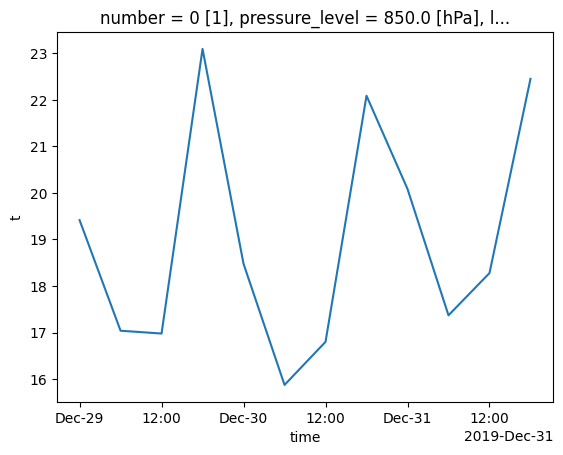

In [50]:
t.sel(longitude=-45.2, latitude=-22.3, method='nearest').isel(pressure_level=1).plot()

###Extraindo um perfil vertical

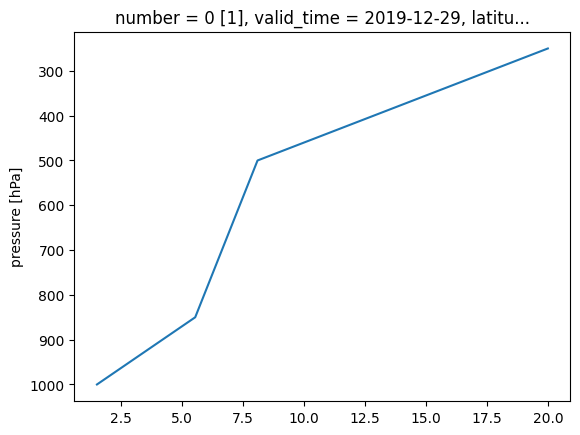

In [52]:
wspd.isel(valid_time=0).sel(longitude=-45.2, latitude=-22.3, method='nearest').plot(y='pressure_level',
                                                                              yincrease=False)

###Gerando mapa

In [56]:
t.pressure_level

<xarray.DataArray 'pressure_level' (pressure_level: 4)> Size: 32B
array([1000.,  850.,  500.,  250.])
Coordinates:
    number          int64 8B ...
  * pressure_level  (pressure_level) float64 32B 1e+03 850.0 500.0 250.0
Attributes:
    long_name:         pressure
    units:             hPa
    positive:          down
    stored_direction:  decreasing
    standard_name:     air_pressure

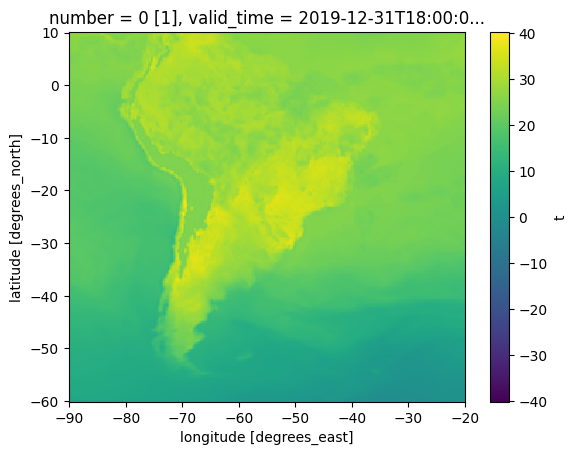

In [57]:
#Gerando um mapa da temperatura para o tempo '2019-12-31T18:00:00' e o nível de 1000 hPa
# t.sel(valid_time='2019-12-31T18:00:00').isel(pressure_level=3).plot(cmap='plasma')
t.sel(valid_time='2019-12-31T18:00:00').isel(pressure_level=0).plot(cmap='viridis')

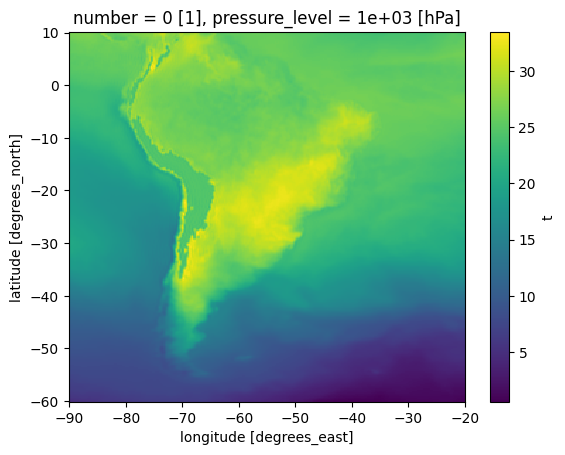

In [55]:
#Gerando um mapa com a temperatura média
t.sel(pressure_level=1000).mean(dim='valid_time').plot()

###Gerando um mapa global com os dados de temperatura

In [63]:
u = ds['u']
v = ds['v']
t = ds['t'] - 273.15 #convertendo de Kelvin para Celsus

wspd = (u**2 + v**2)**(0.5) #Calculando a velocidade do vento

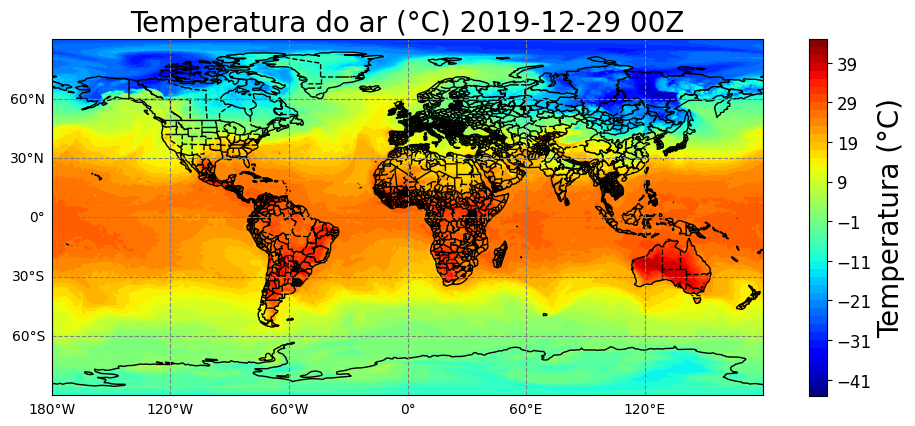

In [95]:
#Criando um objeto de figura para receber o mapa
fig = plt.figure(figsize=(10, 8))

#Criando um eixo com uma determinada projeção
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #pode ver outras projeções na documentação do pacote

#Criando matrizes de longitude e latitude
lon, lat = np.meshgrid(t.longitude, t.latitude)

#Plotando a temperatura do ar para o globo todo
im = ax.contourf(lon, lat, t.isel(valid_time=0, pressure_level=0),
                 levels=np.arange(-45, 46, 2), cmap='jet',
                 transform=ccrs.PlateCarree())

#Inserindo uma colorbar
cbar = plt.colorbar(im, ax=ax, pad=0.06, fraction=0.023)
cbar.set_label(label='Temperatura (°C)', size=20)
cbar.ax.tick_params(labelsize=12)

#Adicionando o contorno dos continentes
ax.add_feature(cfeature.COASTLINE)

#Adicionando os limites dos países
ax.add_feature(cfeature.BORDERS)

#Adicionando os limites estaduais
# Updated: Using 10m scale instead of 50m
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='10m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='k', linestyle='--')


#Adicionando o título da figura
ax.set_title('Temperatura do ar (°C) 2019-12-29 00Z', fontsize=20)

#Adicionando as linhas de grade
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Removendo os labels do topo e da direita
g1.top_labels = False
g1.right_labels = False

#Formatando os labels como latitude e longitude
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

g1.xlabel_style = {'size': 10}
g1.ylabel_style = {'size': 10}

#Salvando o mapa como uma figura
plt.savefig('Mapa_temp_global.png', dpi=300, bbox_inches='tight')

# plt.savefig('/content/drive/MyDrive/00_Disc_Meteo_Pratica_Python/Mapa_temp_global_v2.png', dpi=300, bbox_inches='tight')

###Gerando um mapa da AS com as linhas de corrente

In [96]:
#Extraindo um subset da América do Sul
u_as = u.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
v_as = v.sel(longitude=slice(-90, -20), latitude=slice(10, -60))
wspd_as = wspd.sel(longitude=slice(-90, -20), latitude=slice(10, -60))

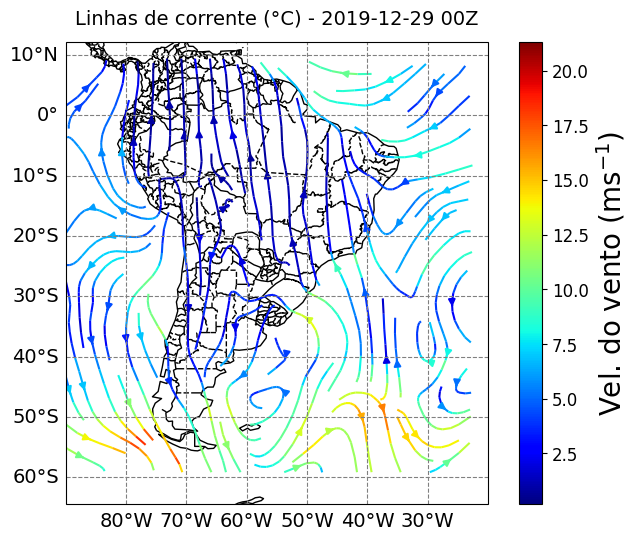

In [103]:
#Criando um objeto de figura para receber o mapa
fig = plt.figure(figsize=(8, 6))

#Criando um eixo com uma determinada projeção
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

#Definindo a extensão do mapa
ax.set_extent([-90, -20, 10, -60])

#Criando matrizes de longitude e latitude
lon, lat = np.meshgrid(u_as.longitude, u_as.latitude)

#Plotando as linhas de corrente e a intensidade do vento
strm = ax.streamplot(lon, lat, u_as.isel(valid_time=0, pressure_level=0).values, v_as.isel(valid_time=0, pressure_level=3).values,
                     color=wspd_as.isel(valid_time=0, pressure_level=0).values, cmap='jet',
                     transform=ccrs.PlateCarree())

#Inserindo uma colorbar
cbar = fig.colorbar(strm.lines)
cbar.set_label(label='Vel. do vento (ms$^{-1}$)', size=20, weight='normal')
cbar.ax.tick_params(labelsize=12)

#Adicionando o contorno dos continentes
ax.add_feature(cfeature.COASTLINE)

#Adicionando os limites dos países
ax.add_feature(cfeature.BORDERS)

#Adicionando os limites estaduais
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines', # Changed name to 'admin_1_states_provinces_lines'
                                      scale='10m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='k', linestyle='--')

#Adicionando o título da figura
ax.set_title('Linhas de corrente (°C) - 2019-12-29 00Z', fontsize=14, y=1.02)

#Adicionando as linhas de grade
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Removendo os labels do topo e da direita
g1.top_labels = False
g1.right_labels = False

#Formatando os labels como latitude e longitude
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

#Mofificando o tamanho da fonte dos labels
g1.xlabel_style = {'size': 14}
g1.ylabel_style = {'size': 14}

#Salvando o mapa como uma figura
plt.savefig('Mapa_streamlines_AS.png', dpi=300, bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/00_Disc_Meteo_Pratica_Python/Mapa_streamlines_AS.png', dpi=300, bbox_inches='tight')
#